In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-38-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Wed Jan 20 2021 19:51:17CET



## Load of the data

In [3]:
regen_data = False
# If we keep it as false, it's going to just load the data. If true it's going to regenerate the data again 

In [4]:
if regen_data:
    from process import load_generate_data
    from process import savedata
    regr_data, class_data = load_generate_data(0.1, 5)
    savedata(regr_data, "regression_data.csv")

In [5]:
if not regen_data:
    from process import loaddata
    regr_data = loaddata("regression_data.csv")

In [6]:
np.random.shuffle(regr_data)
y = regr_data[:,-6:]
x = regr_data[:,:5]

In [7]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 2169 
Valuation sample: 723


In [8]:
x.shape

(2892, 5)

In [9]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [18]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (6, activation = "sigmoid" , input_shape = x.shape))
    model.add(layers.Dropout(0.3))
    model.add (layers.Dense (8, activation = "relu"))
    model.add(layers.Dropout(0.3))
    model.add (layers.Dense (6))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [19]:
model = build_model()
history = model.fit ( x_train, y_train, epochs = 60, batch_size = 1032, validation_data = (x_val, y_val) )
model.save("regr.h5")

Epoch 1/60
3/3 [==============================] - 1s 106ms/step - loss: 0.4170 - mae: 0.5220 - val_loss: 0.2039 - val_mae: 0.4070
Epoch 2/60
3/3 [==============================] - 0s 20ms/step - loss: 0.3594 - mae: 0.4848 - val_loss: 0.1803 - val_mae: 0.3823
Epoch 3/60
3/3 [==============================] - 0s 23ms/step - loss: 0.3227 - mae: 0.4555 - val_loss: 0.1628 - val_mae: 0.3622
Epoch 4/60
3/3 [==============================] - 0s 20ms/step - loss: 0.2929 - mae: 0.4323 - val_loss: 0.1476 - val_mae: 0.3455
Epoch 5/60
3/3 [==============================] - 0s 22ms/step - loss: 0.2816 - mae: 0.4287 - val_loss: 0.1345 - val_mae: 0.3300
Epoch 6/60
3/3 [==============================] - 0s 19ms/step - loss: 0.2510 - mae: 0.3987 - val_loss: 0.1231 - val_mae: 0.3159
Epoch 7/60
3/3 [==============================] - 0s 27ms/step - loss: 0.2296 - mae: 0.3811 - val_loss: 0.1133 - val_mae: 0.3028
Epoch 8/60
3/3 [==============================] - 0s 20ms/step - loss: 0.2269 - mae: 0.3782 - va

3/3 [==============================] - 0s 27ms/step - loss: 0.0084 - mae: 0.0723 - val_loss: 4.7278e-04 - val_mae: 0.0185
Epoch 57/60
3/3 [==============================] - 0s 20ms/step - loss: 0.0078 - mae: 0.0700 - val_loss: 4.7056e-04 - val_mae: 0.0188
Epoch 58/60
3/3 [==============================] - 0s 16ms/step - loss: 0.0076 - mae: 0.0687 - val_loss: 4.8543e-04 - val_mae: 0.0194
Epoch 59/60
3/3 [==============================] - 0s 16ms/step - loss: 0.0068 - mae: 0.0650 - val_loss: 5.0368e-04 - val_mae: 0.0200
Epoch 60/60
3/3 [==============================] - 0s 14ms/step - loss: 0.0064 - mae: 0.0629 - val_loss: 4.9611e-04 - val_mae: 0.0197


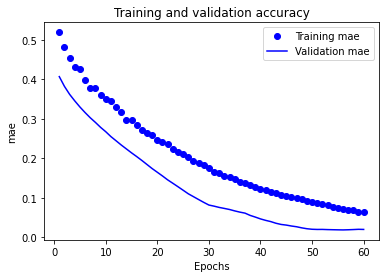

In [20]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

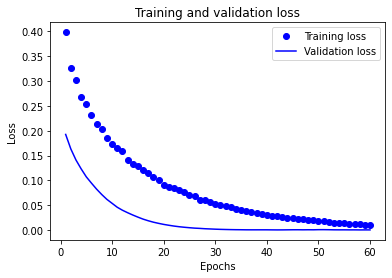

In [14]:
plt.clf()   # clear figure

loss = history.history['loss']
val_loss = history.history['val_loss']



plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## !! 
The dropout 0.2 seems to work better

In [52]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (6, activation = "sigmoid" , input_shape = x.shape))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (16, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (6))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [59]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 100, batch_size = 1232, validation_data = (x_val, y_val) )
model.save("regr.h5")

Epoch 1/100
2/2 [==============================] - 1s 160ms/step - loss: 0.1103 - mae: 0.2631 - val_loss: 0.0511 - val_mae: 0.1814
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0907 - mae: 0.2368 - val_loss: 0.0429 - val_mae: 0.1636
Epoch 3/100
2/2 [==============================] - 0s 57ms/step - loss: 0.0803 - mae: 0.2220 - val_loss: 0.0370 - val_mae: 0.1496
Epoch 4/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0721 - mae: 0.2098 - val_loss: 0.0325 - val_mae: 0.1394
Epoch 5/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0657 - mae: 0.2002 - val_loss: 0.0286 - val_mae: 0.1288
Epoch 6/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0608 - mae: 0.1917 - val_loss: 0.0249 - val_mae: 0.1173
Epoch 7/100
2/2 [==============================] - 0s 52ms/step - loss: 0.0551 - mae: 0.1819 - val_loss: 0.0218 - val_mae: 0.1069
Epoch 8/100
2/2 [==============================] - 0s 63ms/step - loss: 0.0528 - mae: 0.1

2/2 [==============================] - 0s 45ms/step - loss: 0.0033 - mae: 0.0432 - val_loss: 5.6195e-04 - val_mae: 0.0198
Epoch 56/100
2/2 [==============================] - 0s 49ms/step - loss: 0.0032 - mae: 0.0422 - val_loss: 5.8162e-04 - val_mae: 0.0204
Epoch 57/100
2/2 [==============================] - 0s 47ms/step - loss: 0.0030 - mae: 0.0405 - val_loss: 5.4500e-04 - val_mae: 0.0195
Epoch 58/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0028 - mae: 0.0396 - val_loss: 4.9836e-04 - val_mae: 0.0177
Epoch 59/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0026 - mae: 0.0383 - val_loss: 5.0170e-04 - val_mae: 0.0182
Epoch 60/100
2/2 [==============================] - 0s 46ms/step - loss: 0.0025 - mae: 0.0373 - val_loss: 4.6138e-04 - val_mae: 0.0168
Epoch 61/100
2/2 [==============================] - 0s 41ms/step - loss: 0.0024 - mae: 0.0363 - val_loss: 4.8381e-04 - val_mae: 0.0179
Epoch 62/100
2/2 [==============================] - 0s 45ms/step - l

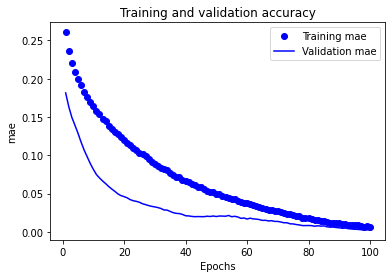

In [60]:
import matplotlib.pyplot as plt

mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()